In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import plotly.express as px

In [2]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

In [3]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
df.drop("Person ID",axis=1,inplace=True)

In [5]:
df.isnull().sum()

Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [6]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [7]:
df.drop_duplicates()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
...,...,...,...,...,...,...,...,...,...,...,...,...
358,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,None
359,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,None
360,Female,59,Nurse,8.2,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
364,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [8]:
df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [9]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

In [10]:
df = pd.concat([df, df['Blood Pressure'].str.split('/', expand=True)], axis=1).drop('Blood Pressure', axis=1)
df = df.rename(columns={0: 'BloodPressure_Upper', 1: 'BloodPressure_Lower'})
df['BloodPressure_Upper'] = df['BloodPressure_Upper'].astype(float)
df['BloodPressure_Lower'] = df['BloodPressure_Lower'].astype(float)

In [11]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])
df['BMI Category'] = label_encoder.fit_transform(df['BMI Category'])
df['Sleep Disorder'] = label_encoder.fit_transform(df['Sleep Disorder'])
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_Upper,BloodPressure_Lower
0,1,27,9,6.1,6,42,6,3,77,4200,1,126.0,83.0
1,1,28,1,6.2,6,60,8,0,75,10000,1,125.0,80.0
2,1,28,1,6.2,6,60,8,0,75,10000,1,125.0,80.0
3,1,28,6,5.9,4,30,8,2,85,3000,2,140.0,90.0
4,1,28,6,5.9,4,30,8,2,85,3000,2,140.0,90.0


In [12]:
# Select features and target
# Here we selected 3 independent variables(to get better accuracy) and a target variable to do the classification and find the confusion matrix 
X = df[['Sleep Duration', 'Stress Level','Physical Activity Level']]  # Feature columns
y = df['Sleep Disorder']  # Target column (labels)

In [13]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [14]:
scaler_d = StandardScaler()
X_train_scaled = scaler_d.fit_transform(X_train)
X_test_scaled = scaler_d.transform(X_test)

In [15]:
# Create the models
model = LogisticRegression( max_iter=1000)

# Fit the models
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [16]:
model_pred = model.predict(X_test_scaled)

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [18]:
model_report = classification_report(y_test, model_pred)

In [19]:
print("[ Logistic Regression report ]\n")
print(model_report)

[ Logistic Regression report ]

              precision    recall  f1-score   support

           0       0.57      0.53      0.55        15
           1       0.72      0.86      0.78        42
           2       0.82      0.50      0.62        18

    accuracy                           0.71        75
   macro avg       0.70      0.63      0.65        75
weighted avg       0.71      0.71      0.70        75



In [20]:
model_accuracy = accuracy_score(y_test, model_pred)

In [21]:
print("model_accuracy:", model_accuracy)

model_accuracy: 0.7066666666666667


In [22]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, model_pred)

In [23]:
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 8  7  0]
 [ 4 36  2]
 [ 2  7  9]]



Key Metrics from the Confusion Matrix:


From the confusion matrix, we can calculate important classification metrics for each class, such as precision, recall, and F1-score.


Class 0 (None):

True Positives (TP): 8

False Positives (FP): 4 + 2 = 6 (predicted as "None" but actually "Sleep Apnea" or "Insomnia")

False Negatives (FN): 7


Class 1 (Sleep Apnea):

True Positives (TP): 36

False Positives (FP): 7 + 7 = 14 (predicted as "Sleep Apnea" but actually "None" or "Insomnia")

False Negatives (FN): 4


Class 2 (Insomnia):

True Positives (TP): 9

False Positives (FP): 0 + 2 = 2 (predicted as "Insomnia" but actually "None" or "Sleep Apnea")


In [25]:
# Select Features and Target (for example, predicting Heart Rate) for linear regression 
# We have selected two variables : Sleep Duration->(INDEPENDENT) and Heart Rate->(DEPENDENT)
X = df[['Sleep Duration']]
y = df['Heart Rate']  # Dependent variable (target)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [28]:
# Step 3: Train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = lin_reg.predict(X_test)

In [30]:
# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [31]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 14.278288330255112
R-squared: 0.27838839301271334


In [32]:
# Step 6: Coefficients of the linear regression (y = aX + b)
coefficients = lin_reg.coef_
intercept = lin_reg.intercept_
print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")


Coefficients: [-2.61662626]
Intercept: 88.7819237512695


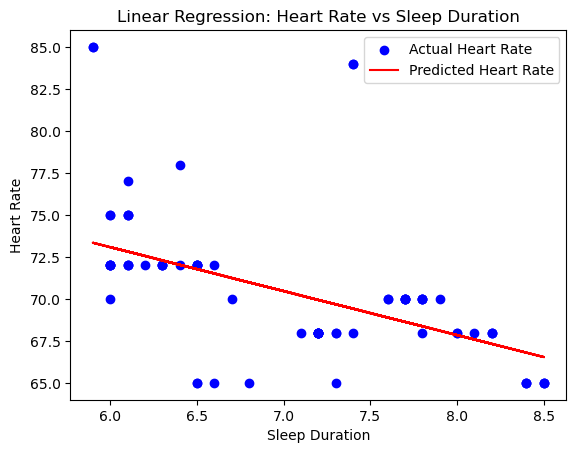

In [33]:
# Step 7: Plotting the results (optional for visualization)
plt.scatter(X_test['Sleep Duration'], y_test, color='blue', label='Actual Heart Rate')
plt.plot(X_test['Sleep Duration'], y_pred, color='red', label='Predicted Heart Rate')
plt.xlabel('Sleep Duration')
plt.ylabel('Heart Rate')
plt.title('Linear Regression: Heart Rate vs Sleep Duration')
plt.legend()
plt.show()

Interpretation:
Regression Line (Red Line):

The red line slopes downward, indicating a negative relationship between sleep duration and heart rate. This means that as sleep duration increases, the predicted heart rate decreases.
The slope of the line suggests that for every hour of increased sleep duration, heart rate decreases slightly.
Spread of Actual Data Points (Blue Dots):

The actual data points show a fair amount of variance around the regression line, meaning that while there is a general trend of decreasing heart rate with longer sleep, the model doesn't perfectly capture the relationship. There are points with similar sleep durations but very different heart rates.
For example, at sleep durations around 6 to 6.5 hours, there is a significant spread of heart rates ranging from about 65 to 85 bpm, indicating that other factors (beyond just sleep duration) may influence heart rate.
Model Fit:

The model captures the general negative trend between sleep duration and heart rate, but the scatter of actual data points indicates that the linear model is not a perfect fit for predicting heart rate based on sleep duration alone. There is still considerable variation in heart rate that the model does not account for.
The correlation between sleep duration and heart rate may be weak, as evidenced by the spread of points.
Summary:
The linear regression suggests a negative correlation: the longer a person sleeps, the lower their heart rate tends to be, according to the model.
However, the spread of actual values shows that sleep duration alone may not be a strong predictor of heart rate, as heart rate appears to be influenced by other factors not included in this regression.
This plot suggests that while sleep duration may have an impact on heart rate, it is likely one of several factors contributing to heart rate variability.

In [35]:
x=df[['Heart Rate','Physical Activity Level']]
y = df['Sleep Disorder']

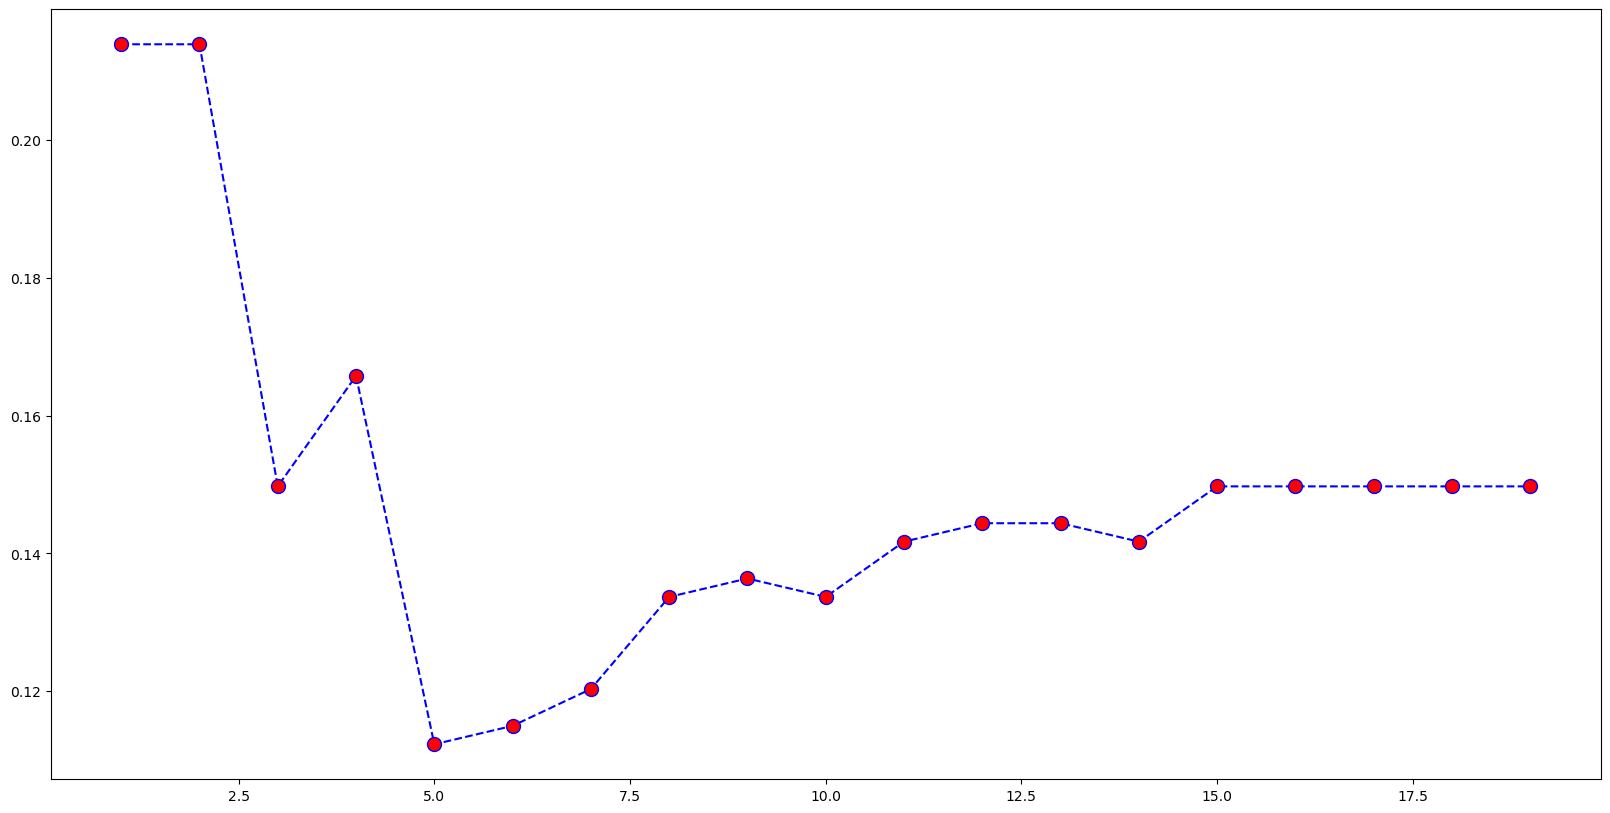

In [36]:
# make the elbow graph
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
SSE=[]
for k in range(1,20):
    clf_knn=KNeighborsClassifier(n_neighbors=k)    # define the model
    clf_knn.fit(x,y)   # fit the data
    pred_k=clf_knn.predict(x)
    SSE.append(np.mean(pred_k != y))
plt.figure(figsize=(20,10))
plt.plot(range(1,20),SSE,color='b',linestyle='dashed',marker='o',markerfacecolor='r',markersize=10)
plt.show()

The graph shows a sharp drop from k = 1 to k = 5, and after k = 5, the slope starts to flatten out.
After k = 5, the improvements in error reduction become less significant, which is why it is typically considered the "elbow" point where you stop gaining much benefit by increasing k.
Thus, based on the shape of this curve, k = 5 seems to be the optimal value.

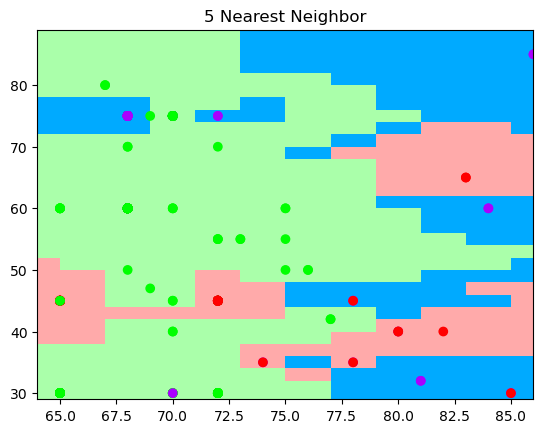

In [38]:
from matplotlib.colors import ListedColormap
n_neighbors=5
h=2
X=x.values[:,0:2]
clf_knn=KNeighborsClassifier(n_neighbors,weights='distance')
clf_knn.fit(X,y)
x_min, x_max=X[:,0].min()-1, X[:,0].max()+1 # x axis is DMC
y_min, y_max=X[:,1].min()-1, X[:,1].max()+1 # y axis is wind
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))  # grids
# defind the backgrouns and predicted items' color map
cmap_l=ListedColormap(['#FFAAAA','#AAFFAA','#00AAFF']) # predicted items
cmap_d=ListedColormap(['#FF0000','#00FF00','#AA00FF']) # background color
Z=clf_knn.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z,cmap=cmap_l) # predicted light
plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap_d) # actual values
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title('5 Nearest Neighbor')
plt.show()

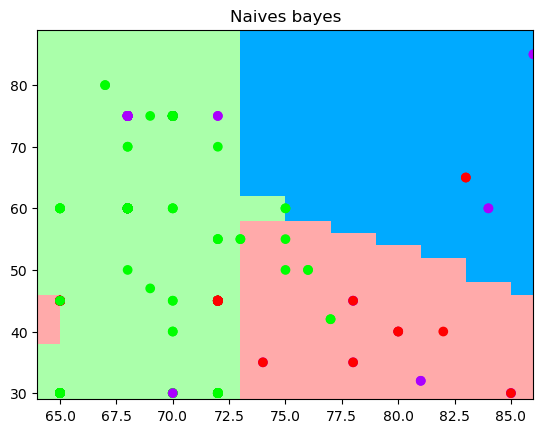

In [39]:
from sklearn.naive_bayes import GaussianNB
from matplotlib.colors import ListedColormap

clf_nb=GaussianNB()
clf_nb.fit(X,y)
x_min, x_max=X[:,0].min()-1, X[:,0].max()+1 # x axis is DMC
y_min, y_max=X[:,1].min()-1, X[:,1].max()+1 # y axis is wind
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))  # grids
# defind the backgrouns and predicted items' color map
cmap_l=ListedColormap(['#FFAAAA','#AAFFAA','#00AAFF']) # predicted items
cmap_d=ListedColormap(['#FF0000','#00FF00','#AA00FF']) # background color

Z=clf_nb.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z,cmap=cmap_l) # predicted light
plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap_d) # actual values
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title('Naives bayes')
plt.show()

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
#Train and evaluate GaussianNB
clf_nb.fit(X_train, y_train)
nb_train_accuracy = clf_nb.score(X_train, y_train)
nb_test_accuracy = clf_nb.score(X_test, y_test)

In [42]:
# Train and evaluate KNN
clf_knn.fit(X_train, y_train)
knn_train_accuracy = clf_knn.score(X_train, y_train)
knn_test_accuracy = clf_knn.score(X_test, y_test)

In [43]:
accuracy_results = {
    'GaussianNB': (nb_train_accuracy, nb_test_accuracy),
    'KNN': (knn_train_accuracy, knn_test_accuracy)
}

In [44]:
accuracy_results

{'GaussianNB': (0.6688963210702341, 0.6533333333333333),
 'KNN': (0.9230769230769231, 0.8666666666666667)}

In [45]:
# Convert the accuracy results into a DataFrame for better visualization
accuracy_df = pd.DataFrame(accuracy_results, index=['Training Accuracy', 'Test Accuracy'])

In [46]:
accuracy_df.head()

,GaussianNB,KNN
Training Accuracy,0.668896,0.923077
Test Accuracy,0.653333,0.866667


Gaussian Naive Bayes:

Moderate accuracy: Both training and testing accuracies for Naive Bayes are in the mid-60% range. This is a moderate level of accuracy, indicating that the model performs reasonably well on both the training and test data.
Generalization: The small gap between the training accuracy (66.89%) and testing accuracy (65.33%) suggests that the Naive Bayes model generalizes fairly well, meaning it doesn’t overfit to the training data. It performs similarly on unseen test data.

K-Nearest Neighbors (KNN):

High training accuracy: The KNN model achieves very high accuracy on the training set (92.31%). This suggests that KNN is capturing a lot of the complexity and patterns in the training data.
Slight drop in test accuracy: The test accuracy for KNN is 86.67%, which is lower than the training accuracy, but still high. The fact that KNN’s test accuracy is slightly lower than its training accuracy could indicate a bit of overfitting—the model may be learning some patterns in the training data that don’t generalize as well to the test set. However, since the test accuracy is still quite high, this overfitting isn’t extreme

Gaussian Naive Bayes: This model has moderate accuracy and appears to generalize fairly well. Naive Bayes assumes that features are independent, which can be a strong assumption and may not always hold true, potentially explaining the lower accuracy. However, it’s a simpler model and less prone to overfitting.

KNN: KNN has higher accuracy but shows signs of potential overfitting, especially with the high training accuracy. KNN is sensitive to local data structures, and depending on the number of neighbors chosen, it can sometimes overfit to the training data, especially when using small values of k.

In general, KNN is performing better in terms of accuracy compared to Naive Bayes, but it may come at the cost of some overfitting, while Naive Bayes provides a more balanced, though less accurate, model. 

In [51]:
# Select 2 training features and 1 target column
x=df[['Heart Rate','Physical Activity Level']]
y = df['Sleep Disorder']

In [52]:
# Creating 4 different  SVM models
from sklearn.metrics import accuracy_score
from sklearn import svm
# linear kernel
svc=svm.SVC(kernel='linear', C=1).fit(x,y)
svc_pred=svc.predict(x)
print('svc accuracy : ',accuracy_score(y,svc_pred)*100)
# linear svm
lin_svc=svm.LinearSVC(C=1, dual=False).fit(x,y)
lsvc_pred=lin_svc.predict(x)
print('linear svc accuracy :',accuracy_score(y,lsvc_pred)*100)
# rbf kernel
rbf_svc=svm.SVC(kernel='rbf', gamma=0.7, C=1).fit(x,y)
rsvc_pred=rbf_svc.predict(x)
print('rbf accuracy :',accuracy_score(y,rsvc_pred)*100)
# poly kernel, degree 3 ax^3+bx^2+cx+d
poly_svc=svm.SVC(kernel='poly', degree=3, C=1).fit(x,y)
psvc_pred=poly_svc.predict(x)
print('poly accuracy :',accuracy_score(y,psvc_pred)*100)

svc accuracy :  66.31016042780749
linear svc accuracy : 68.18181818181817
rbf accuracy : 91.71122994652407
poly accuracy : 72.72727272727273


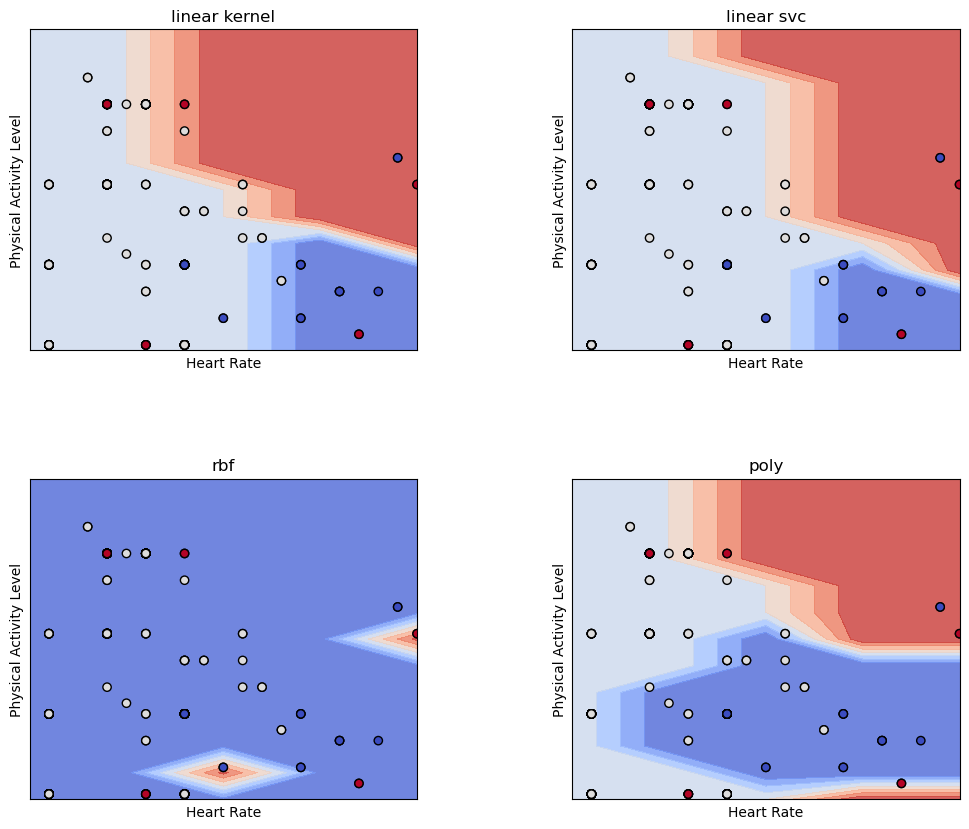

In [53]:
# plots for all the different kernels
h = 5
x_min, x_max = x.iloc[:, 0].min() - 1, x.iloc[:, 0].max() + 1
y_min, y_max = x.iloc[:, 1].min() - 1, x.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

titles = ['linear kernel', 'linear svc', 'rbf', 'poly']
plt.figure(figsize=(12, 10))

for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    # Convert mesh grid to DataFrame with feature names for compatibility
    grid_points = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['Heart Rate','Physical Activity Level'])
    
    # Predict using the model
    Z = clf.predict(grid_points)
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundaries
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k')
    
    plt.xlabel('Heart Rate')
    plt.ylabel('Physical Activity Level')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()


# Random Forest

In [55]:
# Select features and target
# Here we selected 3 independent variables(to get better accuracy) and a target variable 
X = df[['Sleep Duration', 'Stress Level','Physical Activity Level']]  # Feature columns
y = df['Sleep Disorder']  # Target column (labels)

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
# split data to train and test
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3 )
# define the model, fit the model
clf=RandomForestClassifier(n_estimators=50)
clf.fit(X_train, y_train)
RandomForestClassifier(n_estimators=50)
y_pred=clf.predict(X_test)

In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
CM=confusion_matrix(y_pred,y_test)
print(CM)
AS=accuracy_score(y_pred,y_test)
print(AS)
CR=classification_report(y_pred,y_test)
print(CR)

[[15  4  4]
 [ 5 62  3]
 [ 2  0 18]]
0.8407079646017699
              precision    recall  f1-score   support

           0       0.68      0.65      0.67        23
           1       0.94      0.89      0.91        70
           2       0.72      0.90      0.80        20

    accuracy                           0.84       113
   macro avg       0.78      0.81      0.79       113
weighted avg       0.85      0.84      0.84       113



In [59]:
from sklearn.tree import export_graphviz
import graphviz

In [60]:
rf=RandomForestClassifier(n_estimators=1)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1)

In [61]:
len(rf.estimators_)

1

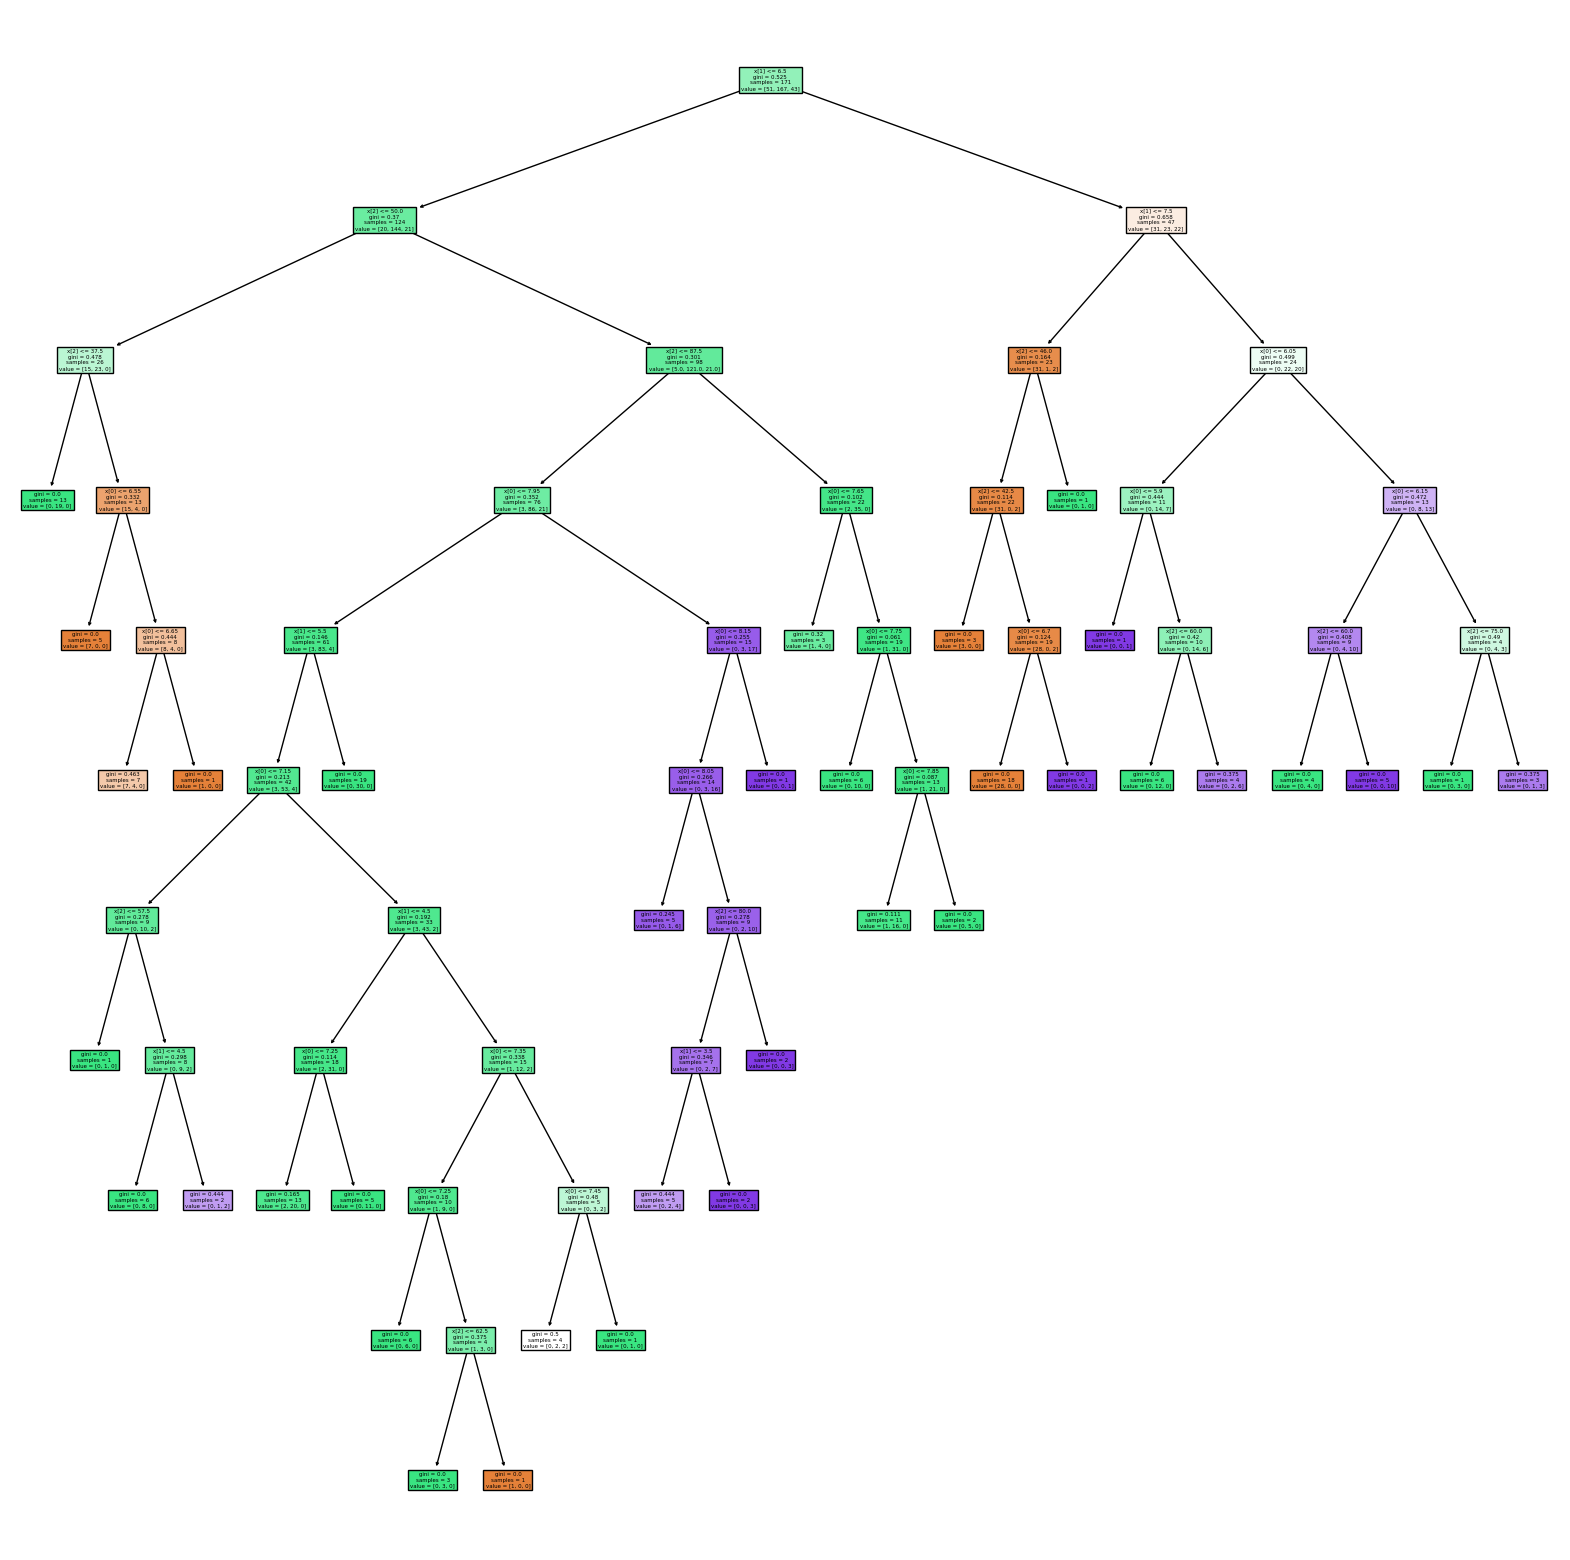

In [62]:
from sklearn import tree
X = df[['Sleep Duration', 'Stress Level','Physical Activity Level']]
y = df['Sleep Disorder']
plt.figure(figsize=(20,20))
_=tree.plot_tree(rf.estimators_[0], filled=True)